In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from tqdm import trange
from dataclasses import dataclass
import csv
import ipywidgets

In [2]:
from module import *

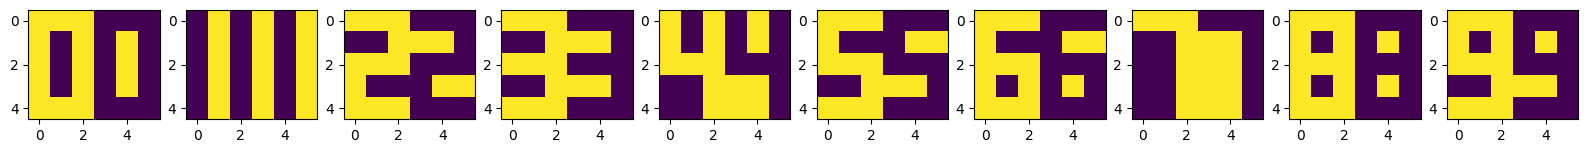

In [3]:
data_rows = {
    "e":  {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1},
    "r":  {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0},
    "c":  {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1},
    "cr": {0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0},
    "l":  {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1},
    "lr": {0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0},
    "lc": {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1},
    "f":  {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0},
    "off":{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
}
numbers = {
    0: "f lr lr lr f",
    1: "c c c c c",
    2: "f r f l f",
    3: "f r f r f",
    4: "lr lr f r r",
    5: "f l f r f",
    6: "f l f lr f",
    7: "f r r r r",
    8: "f lr f lr f",
    9: "f lr f r f",
}
empty = np.array([[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1]])

numbers_rows = {k: [data_rows[vv] for vv in v.split(" ")] for k, v in numbers.items()}

fig, axs = plt.subplots(1, 10, figsize=(20,20))
for ax, n in zip(axs, numbers_rows.values()):
    ax.imshow(pd.DataFrame(n).values)

In [4]:
dendrites = [
    {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }
    },
]
params_dendrites = {
    "tau_leak": 2, 
    "tau_inhibitory": 0,
    "tau_refractory": 1,
    "tau_ltp": 2, 
    "thres": 1700,
    "ainc": 30, 
    "adec": -15, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False,
    "wta": True
}
net = SpikeNetworkSim(inputs_l=6, dt=1)
net.new_dendritic_layer([d["connections"] for d in dendrites], **params_dendrites)

In [5]:
net.weights

,weights,inhibited
24,"[2, 217, 55, 227, 57, 128, 189, 108, 122, 177,...",-1
27,"[62, 26, 7, 106, 103, 169, 160, 226, 97, 154, ...",-1
30,"[38, 145, 18, 81, 31, 59, 106, 239, 175, 164, ...",-1
33,"[248, 191, 172, 71, 80, 149, 253, 219, 7, 118,...",-1


In [6]:
from ipywidgets import Output, HBox
a = Output()
b = Output()
c = Output()
d = Output()
with a:
    display(net.nodes.query("type=='input'"))
with b:
    display(net.nodes.query("type=='buffer'"))
with c:
    display(net.nodes.query("type=='presynaptic'"))
with d:
    display(net.nodes.query("type=='postsynaptic'"))
HBox((a, b, c, d))

In [7]:
test_seq_data = []
test_seq_labels = []
for n in range(10):
        a = n
        test_seq_labels+=[a for _ in range(50)]
        test_seq_data+=[x for x in numbers_rows[a]]
        for i in range(10):
            test_seq_labels.append(-1)
            test_seq_data.append(data_rows["off"])

In [72]:
params_dendrites = {
    "tau_leak": 2, 
    "tau_inhibitory": 2,
    "tau_refractory": 12,
    "tau_ltp": 2, 
    "thres": 1000,
    "ainc": 15, 
    "adec": -15, 
    "wmax": 255, 
    "wmin": 1,
    "learning": True,
    "wta": True,
    "layer_type": "tempotron"
}
net = SpikeNetworkSim(inputs_l=6, dt=1)
net.new_dendritic_layer([d["connections"] for d in dendrites], **params_dendrites)

In [75]:
test_seq_data = []
test_seq_labels = []
for n in range(100):
        a = np.random.randint(10)
        test_seq_labels+=[a for _ in range(50)]
        test_seq_data+=[x for x in numbers_rows[a]]
        for i in range(5):
            test_seq_labels.append(-1)
            test_seq_data.append(data_rows["off"])

In [76]:
out = net.feed_raw(test_seq_data)

In [11]:
from ipywidgets import SelectMultiple, Button, HBox, VBox, Output
def update_graph(b):
    fig, ax = plt.subplots(figsize=(8,8))
    for n in select.value:
        t = out.index.tolist()
        ax.plot(t, out[n])
        ax.legend([f"{n}/{net.labels_dict[n]}" if n != net.labels_dict[n] else n for n in select.value])
    with graph:
        graph.clear_output()
        display(plt.show())
        
    
graph = Output()
select = SelectMultiple(
    options=net.nodes.index.tolist(),
    rows=10,
    description='nodes',
    disabled=False
)
draw = Button(description='Draw')
draw.on_click(update_graph)
HBox((VBox((select, draw)), graph))

In [35]:
net.weights

,weights,inhibited
24,"[255.0, 42.04293966704805, 255.0, 221.04293966...",993
27,"[140, 181, 17, 248, 86, 57, 24, 236, 227, 160,...",995
30,"[10, 67, 199, 112, 153, 215, 54, 53, 156, 45, ...",995
33,"[255.0, 91.25618462259747, 255.0, 205.25618462...",995


In [13]:
params_first_row = {
    "tau_leak": 1, 
    "tau_inhibitory": 10,
    "tau_refractory": 10,
    "tau_ltp": 1, 
    "thres": 750,
    "ainc": 30, 
    "adec": -15, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}
params_second_row = {
    "tau_leak": 1, 
    "tau_inhibitory": 10,
    "tau_refractory": 20,
    "tau_ltp": 1, 
    "thres": 1000,
    "ainc": 30, 
    "adec": -30, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}
params_third_row = {
    "tau_leak": 1, 
    "tau_inhibitory": 10,
    "tau_refractory": 30,
    "tau_ltp": 1, 
    "thres": 1000,
    "ainc": 30, 
    "adec": -30, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}
weights_rows = np.array([
    [1, 1, 1, 255, 255, 255],
    [1, 1, 255, 255, 255, 1],
    [1, 255, 1, 255, 1, 255],
    [1, 255, 255, 255, 1, 1],
    [255, 1, 1, 1, 255, 255],
    [255, 1, 255, 1, 255, 1],
    [255, 255, 1, 1, 1, 255],
    [255, 255, 255, 1, 1, 1]
])
labels_rows = [
    "e",
    "r",
    "c",
    "cr",
    "l",
    "lr",
    "lc",
    "f"
]

In [14]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.
